In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

import math


In [3]:
iris = datasets.load_iris()

In [5]:
import pandas as pd
X= pd.DataFrame(iris['data'],columns=iris['feature_names'])

In [6]:
y=iris['target']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,random_state=101,stratify=y,test_size=0.25)


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt_model=DecisionTreeClassifier(random_state =10)

In [10]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

In [11]:
dt_model.score(X_train,y_train)

1.0

In [18]:
dt_model.score(X_valid,y_valid)

0.9210526315789473

In [19]:

train_accuracy=[]
validation_accuracy=[]
for depth in range(1,10):
    dt_model=DecisionTreeClassifier(max_depth=depth,random_state=10)
    dt_model.fit(X_train,y_train)
    train_accuracy.append(dt_model.score(X_train,y_train))
    validation_accuracy.append(dt_model.score(X_valid,y_valid))
    

In [20]:
frame=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy,'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.669643,0.657895
1,2,0.973214,0.921053
2,3,1.000000,0.921053
3,4,1.000000,0.921053
4,5,1.000000,0.921053


No handles with labels found to put in legend.


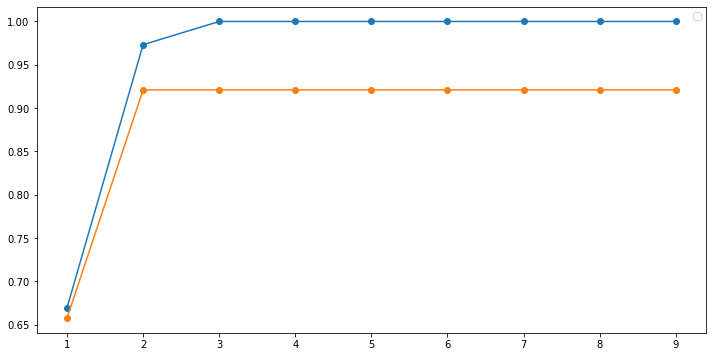

In [21]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'],marker='o')
plt.plot(frame['max_depth'],frame['valid_acc'],marker='o')
plt.legend()

In [25]:
dt_model=DecisionTreeClassifier(max_depth=3, max_leaf_nodes=25, random_state=10)

In [26]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=25, random_state=10)

In [27]:
dt_model.score(X_train,y_train)

1.0

In [28]:
dt_model.score(X_valid,y_valid)

0.9210526315789473

In [29]:
from sklearn import tree

In [30]:
!pip install graphviz

In [34]:
decision_tree=tree.export_graphviz(dt_model,out_file='iris.dot',feature_names=X_train.columns,max_depth=3,filled=True)

In [35]:
!dot -Tpng iris.dot -o iris.png

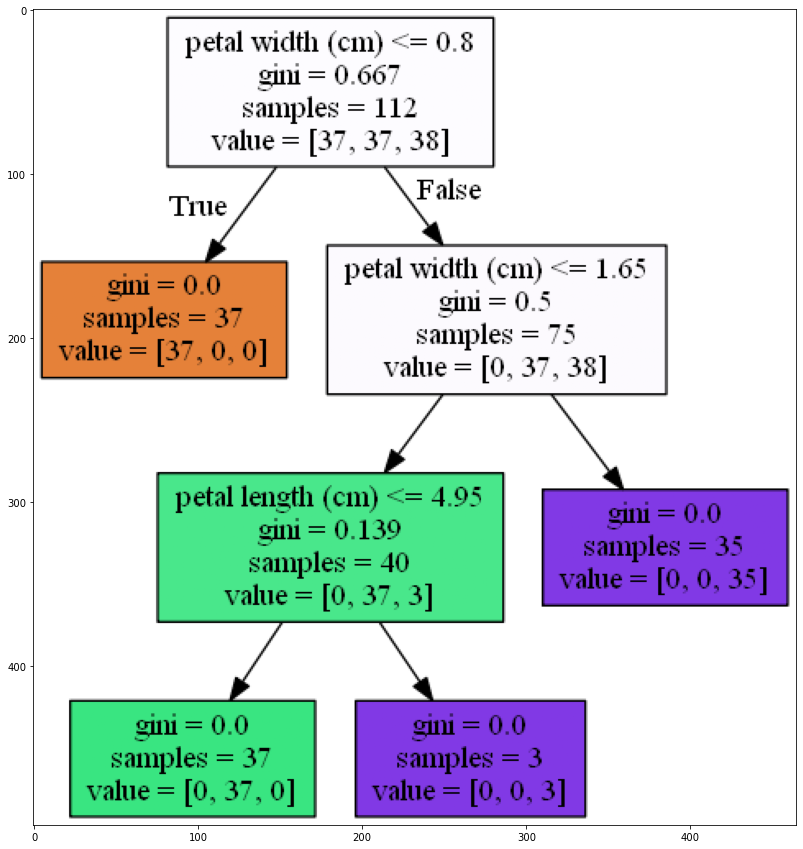

In [36]:
image=plt.imread('iris.png')
plt.figure(figsize=(15,15))
plt.imshow(image)